Combined Results DataFrame:
                               model     task     lang      instr  accuracy  \
0  Mistral-7B-Instruct-v0.2 (Custom)  summary  English  zero-shot      0.95   
1  Mistral-7B-Instruct-v0.2 (Custom)  summary  English   few-shot      0.90   
2  Mistral-7B-Instruct-v0.2 (Custom)  summary  Chinese  zero-shot      0.95   
3  Mistral-7B-Instruct-v0.2 (Custom)  summary  Chinese   few-shot      1.00   
4             TextRank (Traditional)  summary  English  zero-shot       NaN   

   f1_score  inference_time  average_tokens  cosine_similarity  
0  0.221344        6.765799           53.75           0.488008  
1  0.433961        7.418975           31.45           0.571596  
2  0.262163        6.861702           51.80           0.516854  
3  0.496370        6.971007           23.10           0.591598  
4  0.048788        0.000000             NaN           0.474796  
                     model     task     lang      instr  accuracy  f1_score  \
7        LSA (Traditional)  

/tmp/ipython-input-1-2831193613.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/tmp/ipython-input-1-2831193613.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


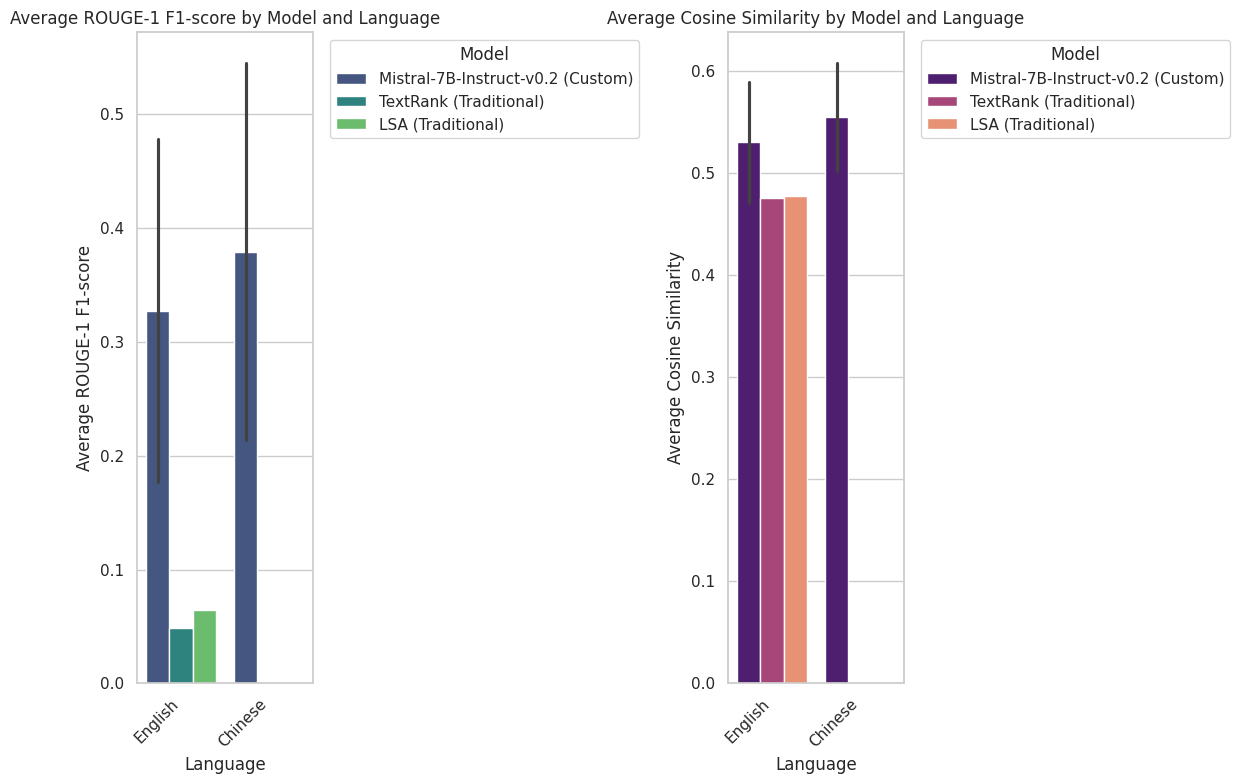


Analysis complete. Check the generated table and plots above.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


llm_results_file = "/content/mistral_benchmark_results.csv"
traditional_results_file = "/content/traditional_summarizer_results.csv"

if os.path.exists(llm_results_file) and os.path.exists(traditional_results_file):
    df_llm = pd.read_csv(llm_results_file)
    df_traditional = pd.read_csv(traditional_results_file)


    df_llm_summary = df_llm[df_llm['task'] == 'summary'].copy()

    df_combined = pd.concat([df_llm_summary, df_traditional], ignore_index=True)

    print("Combined Results DataFrame:")
    print(df_combined.head())
    print(df_combined.tail())

else:
    print("Error: One or both results files not found. Please ensure they are uploaded correctly.")
    exit()


print("\n--- Summary Table of Summarization Benchmarking Results ---")

summary_pivot = df_combined.pivot_table(
    index=['model', 'lang', 'instr'],
    values=['f1_score', 'cosine_similarity'],
    aggfunc='mean'
)
print(summary_pivot)


print("\n--- Generating Visualizations for Summarization Comparison ---")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))


plt.subplot(1, 2, 1)
sns.barplot(
    data=df_combined,
    x='lang',
    y='f1_score',
    hue='model',
    ci='sd',
    palette='viridis'
)
plt.title('Average ROUGE-1 F1-score by Model and Language')
plt.xlabel('Language')
plt.ylabel('Average ROUGE-1 F1-score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


plt.subplot(1, 2, 2)
sns.barplot(
    data=df_combined,
    x='lang',
    y='cosine_similarity',
    hue='model',
    ci='sd',
    palette='magma'
)
plt.title('Average Cosine Similarity by Model and Language')
plt.xlabel('Language')
plt.ylabel('Average Cosine Similarity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

print("\nAnalysis complete. Check the generated table and plots above.")